# 1. Recolección y Análisis de Datos

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.trend import SMAIndicator

In [3]:
def download_and_process_data(ticker, start_date, end_date, output_file=None):
    """
    Descarga datos históricos de un ticker y calcula indicadores técnicos.
    
    Args:
        ticker (str): Símbolo del ticker.
        start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'.
        end_date (str): Fecha de fin en formato 'YYYY-MM-DD'.
        output_file (str): Ruta para guardar el archivo CSV. Si es None, no se guarda.
    
    Returns:
        pd.DataFrame: DataFrame procesado con indicadores técnicos añadidos.
    """
    try:
        # Descargar los datos del ticker
        print(f"Descargando datos para {ticker}...")
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Verificar si los datos están vacíos
        if data.empty:
            print(f"No se encontraron datos para {ticker} en el rango proporcionado.")
            return None

        # Limpiar y procesar el DataFrame
        data.reset_index(inplace=True)  # Asegurarse de que 'Date' no sea índice
        data.dropna(how='all', inplace=True)
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)

        # Renombrar columnas para estandarizar
        data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

        # Calcular indicadores técnicos
        print(f"Calculando indicadores técnicos para {ticker}...")
        data['SMA_50'] = SMAIndicator(data['Close'], window=50).sma_indicator()
        data['SMA_200'] = SMAIndicator(data['Close'], window=200).sma_indicator()
        data['RSI'] = RSIIndicator(data['Close'], window=14).rsi()
        macd = MACD(data['Close'])
        data['MACD'] = macd.macd()
        data['MACD_signal'] = macd.macd_signal()

        # Eliminar filas con valores NaN generados por los cálculos
        data.dropna(inplace=True)

        # Seleccionar columnas relevantes
        data_selected = data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal']]
        
        # Guardar en archivo CSV si se especifica
        if output_file:
            data_selected.to_csv(output_file)
            print(f"Datos guardados en el archivo: {output_file}")
        
        return data_selected

    except Exception as e:
        print(f"Ocurrió un error al procesar los datos para {ticker}: {e}")
        return None


In [5]:
ticker = 'AAPL'
start_date = '2016-01-01'
end_date = '2020-10-31'
output_file = f"../Data/{ticker}_2016_2022.csv"

# Descargar y procesar datos
df = download_and_process_data(ticker, start_date, end_date, output_file)

Descargando datos para AAPL...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No se encontraron datos para AAPL en el rango proporcionado.


In [18]:
print(f"Tamaño del Dataset: {df.shape}")
df

Tamaño del Dataset: (1269, 10)


,Open,High,Low,Close,Volume,SMA_50,SMA_200,RSI,MACD,MACD_signal
Date,,,,,,,,,,
2016-10-17,0.020100,0.022723,0.019487,0.024733,0.121870,0.000000,0.000000,0.656832,0.442204,0.417033
2016-10-18,0.019958,0.022570,0.020197,0.026038,0.131098,0.000430,0.000176,0.682388,0.443273,0.418197
2016-10-19,0.019335,0.021898,0.019334,0.018930,0.086189,0.000673,0.000306,0.442232,0.437590,0.417850
2016-10-20,0.019228,0.021783,0.018605,0.023857,0.126848,0.001031,0.000493,0.546976,0.436882,0.417414
2016-10-21,0.018410,0.020900,0.017704,0.023759,0.117575,0.001384,0.000719,0.544186,0.435823,0.416826
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.938912,0.938202,0.939466,0.947262,0.013100,0.990098,0.996308,0.532414,0.461978,0.348087
2021-10-26,0.944073,0.943422,0.950744,0.958090,0.038374,0.990523,0.997243,0.575560,0.482093,0.371773
2021-10-27,0.940506,0.939814,0.942228,0.954039,0.026452,0.990422,0.998228,0.550362,0.493481,0.393285


In [19]:
df.describe()

,Open,High,Low,Close,Volume,SMA_50,SMA_200,RSI,MACD,MACD_signal
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,0.331658,0.332642,0.334032,0.334699,0.190404,0.328004,0.316202,0.519356,0.453114,0.433885
std,0.290907,0.290418,0.293644,0.290975,0.139486,0.300830,0.286636,0.198525,0.130297,0.137652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117017,0.119125,0.118862,0.119187,0.097264,0.110872,0.126602,0.372390,0.390845,0.367883
50%,0.192527,0.194434,0.192055,0.194399,0.153276,0.182789,0.199882,0.536801,0.448050,0.428066
75%,0.546477,0.547337,0.554933,0.549836,0.241109,0.503230,0.440616,0.659067,0.511977,0.497512
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


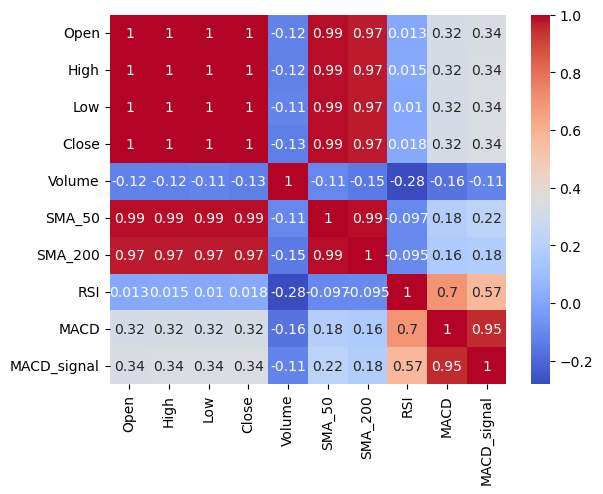

In [20]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

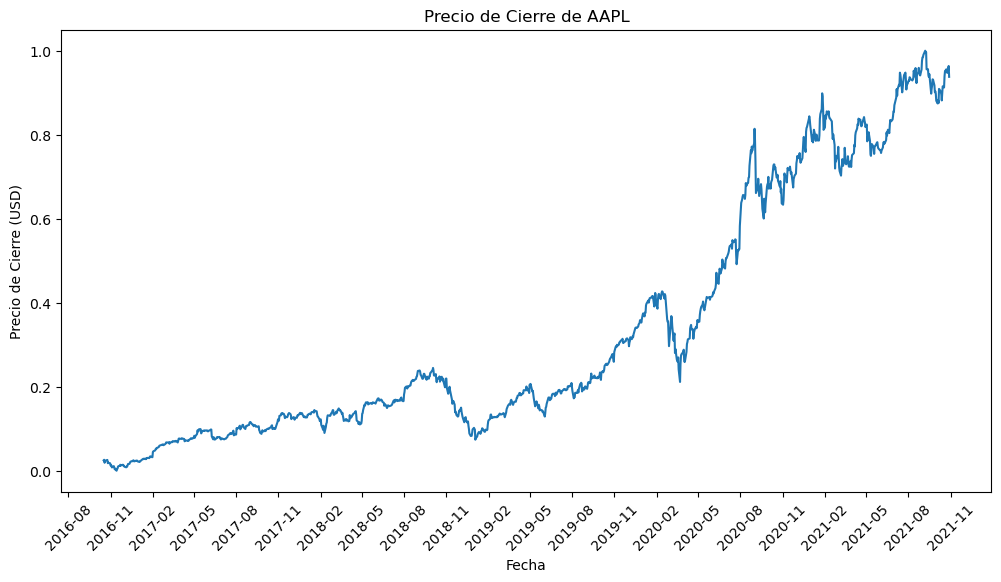

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close')

# Usamos MonthLocator para especificar las fechas a mostrar
months_to_show = [2, 5, 8, 11]  # Meses: enero (1), abril (4), agosto (8), diciembre (12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=months_to_show))  # Mostrar solo los meses seleccionados
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato Año-Mes

# Título y etiquetas
plt.title('Precio de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')

# Rotar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()
